In [2]:
import pandas as pd
import numpy as np
import sys
import os

from typing import Dict, Any, Optional


if ".." not in sys.path:
    sys.path.append("..")
if "../contracts" not in sys.path:
    sys.path.append("../contracts")

from file_manager_helper import load_dataset_tag_contract, save_pandas_dataset
from reducers.dataset_contract_reducers import convert_dataset, modelling_filter
import matplotlib.pyplot as plt
import config

DATE_FORMAT: str = '%Y-%m-%d %H:%M:%S'
OUTPUT_DIR: str = "prepared_datasets/datasets"
OUTPUT_DIR_SANITY_CHECK: str = "sanity_checking_data"
OUTPUT_DIR_SAMPLE: str = "prepared_datasets/sampletest"
    
def save_sanity_checking_dataset(
    dataset: pd.DataFrame,
    dataset_tag: str,
    suffix: str):
    
    dataset.to_csv(os.path.join(OUTPUT_DIR_SANITY_CHECK, dataset_tag, f'{dataset_tag}_for_sanity_checking_{suffix}.csv'))

def save_test_system_dataset(
    dataset: pd.DataFrame,
    dataset_tag: str,
    output_dataset_name: str):

    # Save data for testing the system
    real_time_sample = dataset.tail(20000)
    real_time_sample.index.rename("timestamp", inplace=True)
    real_time_sample.to_csv(os.path.join(OUTPUT_DIR_SAMPLE, dataset_tag, f"BAT_realtime_dataset_{output_dataset_name}.csv"))

def convert_and_save_dataset(
    dataset: pd.DataFrame,
    dataset_tag: str,
    output_dataset_name: str,
    output_dataset_name_suffix: str,
    model_converters: Optional[Dict[str, Any]] = None,
    model_converters_association_tags: Optional[Dict[str, Any]] = None,
    act_on_na: bool = True):

    # Loading the dataset contract
    contract = load_dataset_tag_contract(
        contract_alias=dataset_tag,
         directory=os.path.join("..", config.ZIP_DATASET_CONTRACTS_DIRECTORY, dataset_tag))

    # Convert the dataset
    converted_dataset, dataset = convert_dataset(
        contract=contract,
        dataset=dataset,
        model_converters=model_converters,
        model_converters_association_tags=model_converters_association_tags,
        act_on_na=act_on_na)
    
    #Filter based on conditions of boiler being active
    converted_dataset = modelling_filter(
                           contract=contract,
                           dataset=converted_dataset)

    # Plotting the efficiency
    if "Efficiency Nominal" in set(converted_dataset.columns):
        efficiency_values = converted_dataset["Efficiency Nominal"].values

        plt.plot(range(len(efficiency_values)), efficiency_values)
        plt.show()
        
    converted_dataset.index.names=["date_rec"]
    # Prepare the converted dataset for saving
    dataset = pd.melt(converted_dataset.reset_index(), id_vars='date_rec', value_vars=converted_dataset.columns, var_name='address_no', value_name='value')
    #dataset.rename(columns={'index': 'date_rec'}, inplace=True)
    # Make sure that the date is in the correct format by converting it.
    dataset['date_rec'] = dataset['date_rec'].dt.strftime(DATE_FORMAT)
    # Remove empty values from the dataset
    dataset['value'].replace('', np.nan, inplace=True)
    dataset.dropna(subset=['value'], inplace=True)
    
    
    # Save data for training the models
    save_pandas_dataset(dataset=dataset,
                        dataset_tag=output_dataset_name,
                        dataset_suffix=output_dataset_name_suffix,
                        directory=os.path.join(OUTPUT_DIR, dataset_tag)
    )
    
def concatenate_daily(dir_path: str):
    dataset_to_concat = []
    
    for dir in os.listdir(dir_path):
        daily_df = pd.read_csv(os.path.join(dir_path,dir))
        # Appending dataframes to concatenate
        dataset_to_concat.append(daily_df)
    total_df = pd.concat(dataset_to_concat)
    return total_df

# PCT 1

In [ ]:
#with open('original_format/efficiency_modelling/PCT1/pct_1_efficiency_model.pickle', 'rb') as handle:
#    pct_1_efficiency_calculator = pickle.load(handle)

In [ ]:
dataset_1 = pd.read_csv("provided_data/datasets/PCT1/PCT1.csv", parse_dates= ["timestamp"])
dataset_1.rename(columns={"timestamp":"date_rec"}, inplace=True)

sensor_df = dataset_1.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT1_DATA_TAG,
    suffix=1)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT1_DATA_TAG,
    output_dataset_name="pct1")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT1_DATA_TAG,
    output_dataset_name=config.PCT1_DATA_TAG,
    output_dataset_name_suffix="1",
    act_on_na=True)

In [ ]:
dataset_1 = pd.read_csv("provided_data/datasets/PCT1/PCT1_updt.csv", parse_dates= ["timestamp"])
dataset_1.rename(columns={"timestamp":"date_rec"}, inplace=True)

sensor_df = dataset_1.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT1_DATA_TAG,
    suffix=1)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT1_DATA_TAG,
    output_dataset_name="pct1")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT1_DATA_TAG,
    output_dataset_name=config.PCT1_DATA_TAG,
    output_dataset_name_suffix="2",
    act_on_na=True)

# PCT1 post-overhaul

In [ ]:
dataset_1 = pd.read_csv("provided_data/datasets/PCT1/PCT1_update_2023.csv", parse_dates= ["ts"])
dataset_1.rename(columns={"ts":"date_rec"}, inplace=True)

sensor_df = dataset_1.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT1_DATA_TAG,
    suffix=2)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT1_DATA_TAG,
    output_dataset_name="pct1")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT1_DATA_TAG,
    output_dataset_name=config.PCT1_DATA_TAG,
    output_dataset_name_suffix="3",
    act_on_na=True)

# PCT1 Combination

In [ ]:
PCT1_2 = pd.read_csv("prepared_datasets/datasets/PCT1/dataset_PCT1_2.csv")
PCT1_3 = pd.read_csv("prepared_datasets/datasets/PCT1/dataset_PCT1_3.csv")
dataset_23 = pd.concat([PCT1_2, PCT1_3], ignore_index=True)
dataset_23.to_csv("prepared_datasets//datasets/PCT1/dataset_PCT1_4.csv")

PCT1_2_sanity_check = pd.read_csv("sanity_checking_data/PCT1/PCT1_for_sanity_checking_1.csv")
PCT1_3_sanity_check = pd.read_csv("sanity_checking_data/PCT1/PCT1_for_sanity_checking_2.csv")
sanity_check_PCT1 = pd.concat([PCT1_2_sanity_check, PCT1_3_sanity_check], ignore_index=True)
sanity_check_PCT1.to_csv("sanity_checking_data/PCT1/PCT1_for_sanity_checking_3.csv")

# PCT1

In [ ]:
dataset_1 = pd.read_csv("provided_data/datasets/PCT1_update_2023-03-22.csv", parse_dates= ["f_date_rec"])

dataset_1.rename(columns={"f_date_rec":"date_rec"}, inplace=True)

sensor_df = dataset_1.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT1_DATA_TAG,
    suffix=5)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT1_DATA_TAG,
    output_dataset_name="pct1")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT1_DATA_TAG,
    output_dataset_name=config.PCT1_DATA_TAG,
    output_dataset_name_suffix="5",
    act_on_na=True)

# PCT2 

In [ ]:
dataset_4 = pd.read_csv("provided_data/datasets/PCT2.csv", parse_dates= ["timestamp"])
dataset_4.rename(columns={"timestamp":"date_rec"}, inplace=True)

sensor_df = dataset_4.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT2_DATA_TAG,
    suffix=1)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT2_DATA_TAG,
    output_dataset_name="pct2")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT2_DATA_TAG,
    output_dataset_name=config.PCT2_DATA_TAG,
    output_dataset_name_suffix="1",
    act_on_na=True)

In [ ]:
dataset_4

In [ ]:
dataset_4 = pd.read_csv("provided_data/datasets/PCT2/PCT2_updt.csv", parse_dates= ["timestamp"])
dataset_4.rename(columns={"timestamp":"date_rec"}, inplace=True)

sensor_df = dataset_4.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT2_DATA_TAG,
    suffix=1)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT2_DATA_TAG,
    output_dataset_name="pct2")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT2_DATA_TAG,
    output_dataset_name=config.PCT2_DATA_TAG,
    output_dataset_name_suffix="2",
    act_on_na=True)

# PCT2 post-overhaul

In [ ]:
dataset_4 = pd.read_csv("provided_data/datasets/PCT2/PCT2_updt_2023.csv", parse_dates= ["timestamp"])
dataset_4.rename(columns={"timestamp":"date_rec"}, inplace=True)

sensor_df = dataset_4.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT2_DATA_TAG,
    suffix=2)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT2_DATA_TAG,
    output_dataset_name="pct2")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT2_DATA_TAG,
    output_dataset_name=config.PCT2_DATA_TAG,
    output_dataset_name_suffix="3",
    act_on_na=True)

# PCT2 Combination

In [ ]:
PCT2_2 = pd.read_csv("prepared_datasets/datasets/PCT2/dataset_PCT2_2.csv")
PCT2_3 = pd.read_csv("prepared_datasets/datasets/PCT2/dataset_PCT2_3.csv")
dataset_23 = pd.concat([PCT2_2, PCT2_3], ignore_index=True)
dataset_23.to_csv("prepared_datasets//datasets/PCT2/dataset_PCT2_4.csv")

PCT2_2_sanity_check = pd.read_csv("sanity_checking_data/PCT2/PCT2_for_sanity_checking_1.csv")
PCT2_3_sanity_check = pd.read_csv("sanity_checking_data/PCT2/PCT2_for_sanity_checking_2.csv")
sanity_check_PCT2 = pd.concat([PCT2_2_sanity_check, PCT2_3_sanity_check], ignore_index=True)
sanity_check_PCT2.to_csv("sanity_checking_data/PCT2/PCT2_for_sanity_checking_3.csv")

# PCT2.5

In [ ]:
suffix = 5
dataset_4 = pd.read_csv("provided_data/datasets/PCT2/PCT2_update_2023-04-30.csv", parse_dates= ["f_date_rec"])
dataset_4.rename(columns={"f_date_rec":"date_rec"}, inplace=True)

sensor_df = dataset_4.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT2_DATA_TAG,
    suffix=suffix)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT2_DATA_TAG,
    output_dataset_name="pct2")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.PCT2_DATA_TAG,
    output_dataset_name=config.PCT2_DATA_TAG,
    output_dataset_name_suffix=f"{suffix}",
    act_on_na=True)

# RBG 1

In [ ]:
#with open('original_format/efficiency_modelling/RBG1/rbg_1_efficiency_model.pickle', 'rb') as handle:
#    rbg_1_efficiency_calculator = pickle.load(handle)

In [ ]:
dataset_2 = pd.read_csv("provided_data/datasets/RBG1/UJRBG2 2022-06-20.csv", parse_dates= ["timestamp"])
dataset_2.rename(columns={"timestamp":"date_rec"}, inplace=True)

sensor_df = dataset_2.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.RBG1_DATA_TAG,
    suffix=1)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.RBG1_DATA_TAG,
    output_dataset_name="rbg1")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.RBG1_DATA_TAG,
    output_dataset_name=config.RBG1_DATA_TAG,
    output_dataset_name_suffix="2",
    act_on_na=True)

# RBG1 (incl. Efficiency)

In [ ]:
dataset_2 = pd.read_csv("provided_data/datasets/RBG1/RBG1 07-2023.csv", parse_dates= ["f_date_rec"])
dataset_2.rename(columns={"f_date_rec":"date_rec"}, inplace=True)

sensor_df = dataset_2.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.RBG1_DATA_TAG,
    suffix=1)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.RBG1_DATA_TAG,
    output_dataset_name="rbg1")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.RBG1_DATA_TAG,
    output_dataset_name=config.RBG1_DATA_TAG,
    output_dataset_name_suffix="3",
    act_on_na=True)

# RBG 2

In [ ]:
#with open('original_format/efficiency_modelling/RBG2/rbg_1_efficiency_model.pickle', 'rb') as handle:
#    rbg_3_efficiency_calculator = pickle.load(handle)

In [ ]:
dataset_3 = pd.read_csv("provided_data/datasets/RBG2.csv", parse_dates= ["timestamp"])
dataset_3.rename(columns={"timestamp":"date_rec"}, inplace=True)

sensor_df = dataset_3.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.RBG2_DATA_TAG,
    suffix=1)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.RBG2_DATA_TAG,
    output_dataset_name="rbg2")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.RBG2_DATA_TAG,
    output_dataset_name=config.RBG2_DATA_TAG,
    output_dataset_name_suffix="2",
    act_on_na=False)

# RBG2 (incl. Efficiency)

In [ ]:
dataset_3 = pd.read_csv("provided_data/datasets/RBG2/RBG2 07-2023.csv", parse_dates= ["f_date_rec"])
dataset_3.rename(columns={"f_date_rec":"date_rec"}, inplace=True)

sensor_df = dataset_3.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.RBG2_DATA_TAG,
    suffix=1)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.RBG2_DATA_TAG,
    output_dataset_name="rbg2")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.RBG2_DATA_TAG,
    output_dataset_name=config.RBG2_DATA_TAG,
    output_dataset_name_suffix="3",
    act_on_na=True)

# KTT 1

## KTT 1.1

In [ ]:
dataset_5 = concatenate_daily("provided_data/datasets/KTT1/UJKTT_1/model_data")
dataset_5["f_timestamp"] = pd.to_datetime(dataset_5["f_timestamp"]) 
dataset_5 = dataset_5.sort_values(by="f_timestamp")
dataset_5.rename(columns={"f_timestamp":"date_rec"}, inplace=True)

sensor_df = dataset_5.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.KTT1_DATA_TAG,
    suffix=1)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.KTT1_DATA_TAG,
    output_dataset_name="ktt1")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.KTT1_DATA_TAG,
    output_dataset_name=config.KTT1_DATA_TAG,
    output_dataset_name_suffix="1",
    act_on_na=False)

## KTT 1.2 (compensating for KALTIM1.SIGNAL.AI.10HBK31CQ101 unavailability)

In [ ]:
dataset_7 = concatenate_daily("provided_data/datasets/KTT1/KTT1_additional_data_1/KTT1_13022022_12042022")
dataset_7["f_timestamp"] = pd.to_datetime(dataset_7["f_timestamp"]) 
dataset_7 = dataset_7.sort_values(by="f_timestamp")
dataset_7.rename(columns={"f_timestamp":"date_rec"}, inplace=True)
sensor_df = dataset_7.set_index("date_rec")

# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.KTT1_DATA_TAG,
    suffix=2)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.KTT1_DATA_TAG,
    output_dataset_name="ktt1")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.KTT1_DATA_TAG,
    output_dataset_name=config.KTT1_DATA_TAG,
    output_dataset_name_suffix="2",
    act_on_na=True)

## KTT 1.3 (combination of the two)

In [ ]:
KTT_11 = pd.read_csv("prepared_datasets/dataset_KTT1_1.csv")
KTT_12 = pd.read_csv("prepared_datasets/dataset_KTT1_2.csv")
dataset_8 = pd.concat([KTT_11, KTT_12], ignore_index=True)
dataset_8.to_csv("prepared_datasets/dataset_KTT1_3.csv")

# KTT 2

# KTT 2.1

In [ ]:
dataset_6 = concatenate_daily("provided_data/datasets/KTT2/KTT2_additional_data_1/KTT2_13022022_12042022")
dataset_6["f_timestamp"] = pd.to_datetime(dataset_6["f_timestamp"]) 
dataset_6 = dataset_6.sort_values(by="f_timestamp")
dataset_6.rename(columns={"f_timestamp":"date_rec"}, inplace=True)

sensor_df = dataset_6.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.KTT2_DATA_TAG,
    suffix=1)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.KTT2_DATA_TAG,
    output_dataset_name="ktt2")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.KTT2_DATA_TAG,
    output_dataset_name=config.KTT2_DATA_TAG,
    output_dataset_name_suffix="1",
    act_on_na=True)

# KTT 2.2

In [ ]:
dataset_11 = concatenate_daily("provided_data/datasets/KTT2/UJKTT_2/model_data")
dataset_11["f_timestamp"] = pd.to_datetime(dataset_11["f_timestamp"]) 
dataset_11 = dataset_11.sort_values(by="f_timestamp")
dataset_11.rename(columns={"f_timestamp":"date_rec"}, inplace=True)

sensor_df = dataset_11.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.KTT2_DATA_TAG,
    suffix=2)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.KTT2_DATA_TAG,
    output_dataset_name="ktt2")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.KTT2_DATA_TAG,
    output_dataset_name=config.KTT2_DATA_TAG,
    output_dataset_name_suffix="1",
    act_on_na=True)

# KTT 2.3

In [ ]:
KTT_21 = pd.read_csv("prepared_datasets/dataset_KTT2_1.csv")
KTT_22 = pd.read_csv("prepared_datasets/dataset_KTT2_2.csv")
dataset_12 = pd.concat([KTT_21, KTT_22], ignore_index=True)
dataset_12.to_csv("prepared_datasets/dataset_KTT2_3.csv")
KTT_21_sanity_check = pd.read_csv("KTT2_for_sanity_checking.csv")
KTT_22_sanity_check = pd.read_csv("KTT2_for_sanity_checking1.csv.csv")

# KTT 2.4

In [ ]:
dataset_13 = concatenate_daily("provided_data/datasets/KTT2/KTT2_20220904_20220923")
dataset_13["f_timestamp"] = pd.to_datetime(dataset_13["f_timestamp"]) 
dataset_13 = dataset_13.sort_values(by="f_timestamp")
dataset_13.rename(columns={"f_timestamp":"date_rec"}, inplace=True)

sensor_df = dataset_13.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.KTT2_DATA_TAG,
    suffix=2)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.KTT2_DATA_TAG,
    output_dataset_name="ktt2")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.KTT2_DATA_TAG,
    output_dataset_name=config.KTT2_DATA_TAG,
    output_dataset_name_suffix="4",
    act_on_na=True)

# KTT 2.5

In [ ]:
KTT_23 = pd.read_csv("prepared_datasets/dataset_KTT2_3.csv")
KTT_24 = pd.read_csv("prepared_datasets/dataset_KTT2_4.csv")
dataset_14 = pd.concat([KTT_23, KTT_24], ignore_index=True)
dataset_14.to_csv("prepared_datasets/dataset_KTT2_5.csv")

In [ ]:
KTT_21_sanity_check = pd.read_csv("KTT2_for_sanity_checking.csv")
KTT_22_sanity_check = pd.read_csv("KTT2_for_sanity_checking1.csv")
KTT_23_sanity_check = pd.read_csv("KTT2_for_sanity_checking2.csv")
sanity_check_KTT2 = pd.concat([KTT_21_sanity_check,KTT_22_sanity_check,KTT_23_sanity_check], ignore_index=True)

In [ ]:
sanity_check_KTT2.to_csv("sanity_check_KTT2.csv")

# AMG 1

In [ ]:
dataset_9 = pd.read_csv("provided_data/datasets/AMG1/AMG1_new.csv", parse_dates=["timestamp"])
pa_pressure_dataset_9 = pd.read_csv("provided_data/datasets/AMG1/ALA30CP101.csv", parse_dates=["timestamp"])
pa_pressure_dataset_9 = pa_pressure_dataset_9.sort_values(by="timestamp")
dataset_9 = dataset_9.sort_values(by="timestamp")
dataset_9["ALA30CP101"] = pa_pressure_dataset_9["ALA30CP101"]
dataset_9.rename(columns={"timestamp":"date_rec"}, inplace=True)

sensor_df = dataset_9.set_index("date_rec")
#Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.AMG1_DATA_TAG,
    suffix=1)

save_test_system_dataset(
   dataset=sensor_df,
   dataset_tag=config.AMG1_DATA_TAG,
   output_dataset_name="amg1")

convert_and_save_dataset(
   dataset=sensor_df,
   dataset_tag=config.AMG1_DATA_TAG,
   output_dataset_name=config.AMG1_DATA_TAG,
   output_dataset_name_suffix="2",
   act_on_na=True)

# AMG 2

In [ ]:
dataset_10 = pd.read_csv("provided_data/datasets/AMG2/AMG2_new.csv", parse_dates=["timestamp"])
pa_pressure_dataset_10 = pd.read_csv("provided_data/datasets/AMG2/BLA30CP101.csv", parse_dates=["timestamp"]) 
pa_pressure_dataset_10 = pa_pressure_dataset_10.sort_values(by="timestamp")
dataset_10 = dataset_10.sort_values(by="timestamp")
dataset_10["BLA30CP101"] = pa_pressure_dataset_10["BLA30CP101"]
dataset_10.rename(columns={"timestamp":"date_rec"}, inplace=True)

sensor_df = dataset_10.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.AMG2_DATA_TAG,
    suffix=1)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.AMG2_DATA_TAG,
    output_dataset_name="amg2")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.AMG2_DATA_TAG,
    output_dataset_name=config.AMG2_DATA_TAG,
    output_dataset_name_suffix="2",
    act_on_na=True)

# BLK1

In [ ]:
dataset_14 = pd.read_csv("provided_data/datasets/BLK1.csv", parse_dates=["Unnamed: 0"])
dataset_14 = dataset_14.sort_values(by="Unnamed: 0")
dataset_14.rename(columns={"Unnamed: 0":"date_rec"}, inplace=True)

sensor_df = dataset_14.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLK1_DATA_TAG,
    suffix=1)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLK1_DATA_TAG,
    output_dataset_name="blk1")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLK1_DATA_TAG,
    output_dataset_name=config.BLK1_DATA_TAG,
    output_dataset_name_suffix="1",
    act_on_na=True)

# BLK 1 (incl. Efficiency)

In [ ]:
dataset_14 = pd.read_csv("provided_data/datasets/BLK1/UJBLK1.csv", parse_dates=["f_date_rec"])
dataset_14 = dataset_14.sort_values(by="f_date_rec")
dataset_14.rename(columns={"f_date_rec":"date_rec"}, inplace=True)

sensor_df = dataset_14.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLK1_DATA_TAG,
    suffix=1)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLK1_DATA_TAG,
    output_dataset_name="blk1")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLK1_DATA_TAG,
    output_dataset_name=config.BLK1_DATA_TAG,
    output_dataset_name_suffix="2",
    act_on_na=True)

# BLK2

In [ ]:
dataset_15 = pd.read_csv("provided_data/datasets/BLK2/BLK2.csv", parse_dates=["Unnamed: 0"])
dataset_15 = dataset_15.sort_values(by="Unnamed: 0")
dataset_15.rename(columns={"Unnamed: 0":"date_rec"}, inplace=True)

sensor_df = dataset_15.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLK2_DATA_TAG,
    suffix=1)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLK2_DATA_TAG,
    output_dataset_name="blk2")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLK2_DATA_TAG,
    output_dataset_name=config.BLK2_DATA_TAG,
    output_dataset_name_suffix="1",
    act_on_na=True)

# BLK2 (incl. Efficiency)

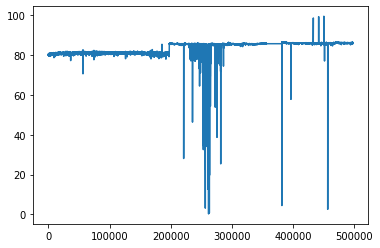

In [8]:
dataset_15 = pd.read_csv("provided_data/datasets/BLK2/UJBLK2.csv", parse_dates=["f_date_rec"])
dataset_15 = dataset_15.sort_values(by="f_date_rec")
dataset_15.rename(columns={"f_date_rec":"date_rec"}, inplace=True)

sensor_df = dataset_15.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLK2_DATA_TAG,
    suffix=2)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLK2_DATA_TAG,
    output_dataset_name="blk2")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLK2_DATA_TAG,
    output_dataset_name=config.BLK2_DATA_TAG,
    output_dataset_name_suffix="2",
    act_on_na=True)

# BLT1 with Efficiency

In [ ]:
dataset_16 = pd.read_csv(f"provided_data/datasets/{config.BLT1_DATA_TAG}/BLT1.csv", parse_dates=["timestamp"])
dataset_16 = dataset_16.sort_values(by="timestamp")
dataset_16.rename(columns={"timestamp":"date_rec"}, inplace=True)

efficiency_blt1 = pd.read_csv(f"provided_data/datasets/{config.BLT1_DATA_TAG}/Eff_BLT1.csv")
efficiency_blt1.rename(columns={"Unnamed: 0": "date_rec",
                                "Boiler (Fuel) Efficiency": "Efficiency"}, inplace=True)
efficiency_blt1["date_rec"] = pd.to_datetime(efficiency_blt1["date_rec"])
dataset_16 = dataset_16.merge(efficiency_blt1, how="left", on="date_rec")


sensor_df = dataset_16.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLT1_DATA_TAG,
    suffix=2)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLT1_DATA_TAG,
    output_dataset_name="blt1")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLT1_DATA_TAG,
    
    output_dataset_name=config.BLT1_DATA_TAG,
    output_dataset_name_suffix="2",
    act_on_na=True)

# BLT1

In [ ]:
dataset_16 = pd.read_csv(f"provided_data/datasets/{config.BLT1_DATA_TAG}/BLT1.csv", parse_dates=["timestamp"])
dataset_16 = dataset_16.sort_values(by="timestamp")
dataset_16.rename(columns={"timestamp":"date_rec"}, inplace=True)

sensor_df = dataset_16.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLT1_DATA_TAG,
    suffix=1)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLT1_DATA_TAG,
    output_dataset_name="blt1")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLT1_DATA_TAG,
    
    output_dataset_name=config.BLT1_DATA_TAG,
    output_dataset_name_suffix="2",
    act_on_na=True)

# BLT 2 with Efficiency

In [ ]:
dataset_17 = pd.read_csv(f"provided_data/datasets/{config.BLT2_DATA_TAG}/BLT2.csv", parse_dates=["timestamp"])
dataset_17 = dataset_17.sort_values(by="timestamp")
dataset_17.rename(columns={"timestamp":"date_rec"}, inplace=True)

efficiency_blt2 = pd.read_csv(f"provided_data/datasets/{config.BLT2_DATA_TAG}/Eff_BLT2.csv")
efficiency_blt2.rename(columns={"Unnamed: 0": "date_rec",
                                "Boiler (Fuel) Efficiency": "Efficiency"}, inplace=True)
efficiency_blt2["date_rec"] = pd.to_datetime(efficiency_blt2["date_rec"])
dataset_17 = dataset_17.merge(efficiency_blt2, how="left", on="date_rec")

sensor_df = dataset_17.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLT2_DATA_TAG,
    suffix=1)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLT2_DATA_TAG,
    output_dataset_name="blt2")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLT2_DATA_TAG,
    output_dataset_name=config.BLT2_DATA_TAG,
    output_dataset_name_suffix="2",
    act_on_na=True)


# BLT2

In [ ]:
dataset_17 = pd.read_csv(f"provided_data/datasets/{config.BLT2_DATA_TAG}/BLT2.csv", parse_dates=["timestamp"])
dataset_17 = dataset_17.sort_values(by="timestamp")
dataset_17.rename(columns={"timestamp":"date_rec"}, inplace=True)

sensor_df = dataset_17.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLT2_DATA_TAG,
    suffix=1)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLT2_DATA_TAG,
    output_dataset_name="blt2")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.BLT2_DATA_TAG,
    output_dataset_name=config.BLT2_DATA_TAG,
    output_dataset_name_suffix="3",
    act_on_na=True)

# PAITON9

In [ ]:
dataset_18 = pd.read_csv("provided_data/datasets/PTN9.csv", parse_dates=["f_date_rec"])
dataset_18 = dataset_18.sort_values(by="f_date_rec")
dataset_18.rename(columns={"Unnamed: 0":"f_date_rec"}, inplace=True)

sensor_df = dataset_18.set_index("f_date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.PTN9_DATA_TAG,
    suffix=1)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.PTN9_DATA_TAG,
    output_dataset_name="ptn9")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.PTN9_DATA_TAG,
    output_dataset_name=config.PTN9_DATA_TAG,
    output_dataset_name_suffix="1",
    act_on_na=True)

# PAITON9 v2

In [ ]:
dataset_18 = pd.read_csv("provided_data/datasets/PTN9_v2.csv", parse_dates=["f_date_rec"])
dataset_18 = dataset_18.sort_values(by="f_date_rec")
dataset_18.rename(columns={"Unnamed: 0":"f_date_rec"}, inplace=True)

sensor_df = dataset_18.set_index("f_date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.PTN9_DATA_TAG,
    suffix=2)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.PTN9_DATA_TAG,
    output_dataset_name="ptn9v2")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.PTN9_DATA_TAG,
    output_dataset_name=config.PTN9_DATA_TAG,
    output_dataset_name_suffix="2",
    act_on_na=True)

# PAITON9 v3

In [2]:
dataset_18 = pd.read_csv("provided_data/datasets/PTN9_v3.csv", parse_dates=["timestamp"])
dataset_18 = dataset_18.sort_values(by="timestamp")
dataset_18.rename(columns={"timestamp":"date_rec"}, inplace=True)

sensor_df = dataset_18.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.PTN9_DATA_TAG,
    suffix=3)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.PTN9_DATA_TAG,
    output_dataset_name="ptn9v3")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.PTN9_DATA_TAG,
    output_dataset_name=config.PTN9_DATA_TAG,
    output_dataset_name_suffix="3",
    act_on_na=True)

FileNotFoundError: [Errno 2] No such file or directory: 'provided_data/datasets/PTN9_v3.csv'

# PAITON9 v4

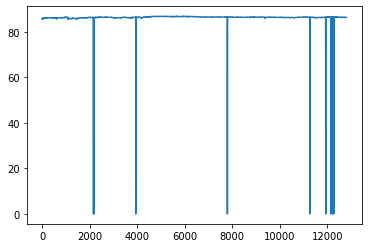

In [3]:
dataset_19 = pd.read_csv("provided_data/datasets/PTN9/Paiton9_historian_v4_1.csv", parse_dates=["f_date_rec"])
dataset_19 = dataset_19.sort_values(by="f_date_rec")
dataset_19.rename(columns={"f_date_rec":"date_rec"}, inplace=True)

split_date = '2023-09-15'
dataset_19 = dataset_19[dataset_19['date_rec'] < split_date]
sensor_df = dataset_19.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.PTN9_DATA_TAG,
    suffix=4)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.PTN9_DATA_TAG,
    output_dataset_name="ptn9v4")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.PTN9_DATA_TAG,
    output_dataset_name=config.PTN9_DATA_TAG,
    output_dataset_name_suffix="4",
    act_on_na=True)

In [12]:
sensor_df.shape

(14357, 64)

# PAITON9 v5 (train)

In [4]:
PTN9_3 = pd.read_csv("prepared_datasets/datasets/PTN9/dataset_PTN9_3.csv")
PTN9_4 = pd.read_csv("prepared_datasets/datasets/PTN9/dataset_PTN9_4.csv")
dataset_21 = pd.concat([PTN9_3, PTN9_4], ignore_index=True)
dataset_21.to_csv("prepared_datasets/datasets/PTN9/dataset_PTN9_5.csv")

# PAITON9 v6 (test)

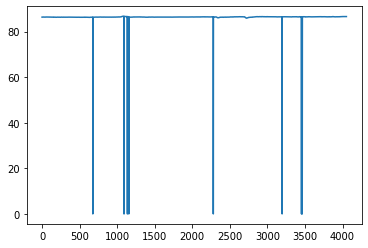

In [5]:
split_date = '2023-09-15'
dataset_20 = pd.read_csv("provided_data/datasets/PTN9/Paiton9_historian_v4_1.csv", parse_dates=["f_date_rec"])
dataset_20 = dataset_20.sort_values(by="f_date_rec")
dataset_20.rename(columns={"f_date_rec":"date_rec"}, inplace=True)

dataset_20 = dataset_20[dataset_20['date_rec'] >= split_date]

sensor_df = dataset_20.set_index("date_rec")
# Drop NAs only if for a row there are only NANs
sensor_df = sensor_df.dropna(how="all")
sensor_df = sensor_df[~sensor_df.index.duplicated(keep='first')]

save_sanity_checking_dataset(
    dataset=sensor_df,
    dataset_tag=config.PTN9_DATA_TAG,
    suffix=6)

save_test_system_dataset(
    dataset=sensor_df,
    dataset_tag=config.PTN9_DATA_TAG,
    output_dataset_name="ptn9v6")

convert_and_save_dataset(
    dataset=sensor_df,
    dataset_tag=config.PTN9_DATA_TAG,
    output_dataset_name=config.PTN9_DATA_TAG,
    output_dataset_name_suffix="6_test",
    act_on_na=True)

In [9]:
dataset_19.shape

(14357, 65)